In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


## Loading Packages

In [49]:
import h5py
import healpy as hp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy
from scipy import stats
from matplotlib.colors import LogNorm
from urllib.request import urlopen

matplotlib.rcParams.update({'font.size': 24})

## Fig 1. Left Panel

In [4]:
psnr_non_zero_ts_all=np.load('./datafiles/Data_for_Histograms/O2_with_HWI_TS_SNR_hist.npy')
psnr_non_zero_zl_all=np.load('./datafiles/Data_for_Histograms/O2_with_HWI_ZL_SNR_hist.npy')

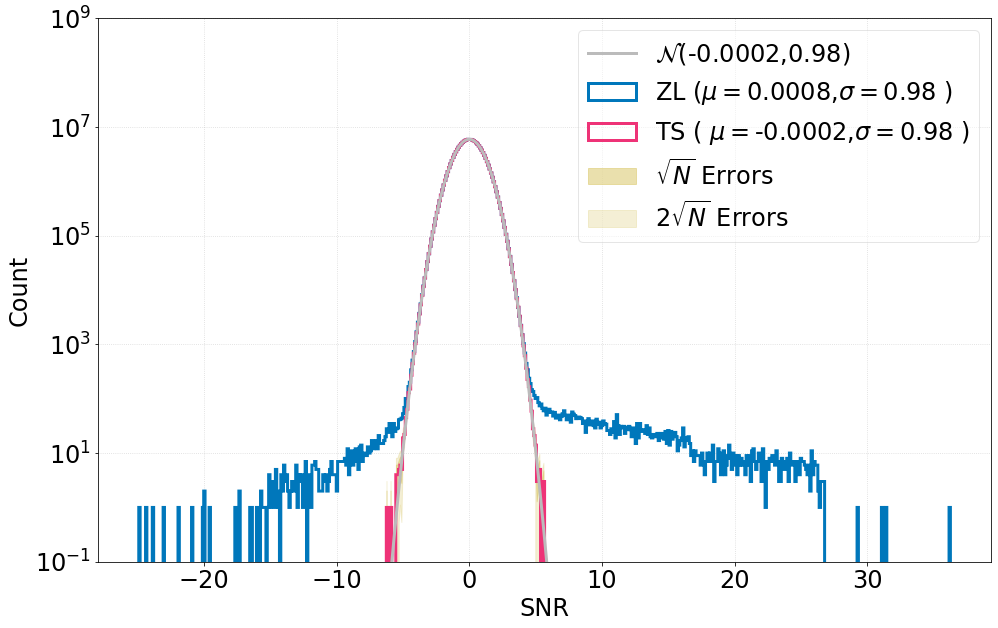

In [18]:
plt.figure(figsize=(16,10))

N=len(psnr_non_zero_zl_all)

m=np.mean(psnr_non_zero_zl_all)
sigma=np.std(psnr_non_zero_zl_all)    
h=plt.hist(psnr_non_zero_zl_all,bins=600,histtype='step',
           label='ZL ('+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#0077BB',linewidth=3)
bm=h[1][:-1]+(h[1][1]-h[1][0])/2.
m=np.mean(psnr_non_zero_ts_all)
sigma=np.std(psnr_non_zero_ts_all)
h=plt.hist(psnr_non_zero_ts_all,bins=h[1],histtype='step',
           label='TS ( '+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#EE3377',linewidth=3)
plt.plot(bm,N*(h[1][1]-h[1][0])*stats.norm.pdf(bm,m,sigma),label=r'$\mathcal{N} ($'+
                             np.str(np.around(m,4))+','+np.str(np.around(sigma,2))+')',linewidth=3,color='#BBBBBB')
plt.fill_between(bm,h[0]-np.sqrt(h[0]),h[0]+np.sqrt(h[0]),color='#DDCC77',alpha=.6,label=r'$\sqrt{N}$ '+'Errors')
plt.fill_between(bm,h[0]-2*np.sqrt(h[0]),h[0]+2*np.sqrt(h[0]),color='#DDCC77',alpha=.3,label=r'$2\sqrt{N}$ '+'Errors')
plt.legend(loc='upper right',framealpha=0.5, frameon=True)
#plt.title(bb)
plt.yscale('log')
plt.xlabel('SNR')
plt.ylim(ymin=0.1,ymax=1e9)
plt.ylabel('Count')
plt.grid(ls=':',alpha=0.5)
#plt.savefig('./Paper_Plots/'+'O2_inj_SNR_hist',bbox_inches='tight')     
plt.show()
#plt.clf()

## Fig.1 Right Panel

In [15]:
data=h5py.File('./datafiles/O2_with_HWI_Freq_max_SNR.hdf5','r')
max_snr_zl=data['max_snr_zl'][:]
max_snr_ts=data['max_snr_ts'][:]
f_all=data['f_all'][:]
freq=data['freq'][:]
snr_limit= data['snr_limit_smooth'][:]
cand_freq=data['cand_freq'][:]
cand_SNR=data['cand_SNR'][:]
threshold = data['threshold'][()]
inj_freq=data['inj_freq'][:]
data.close()

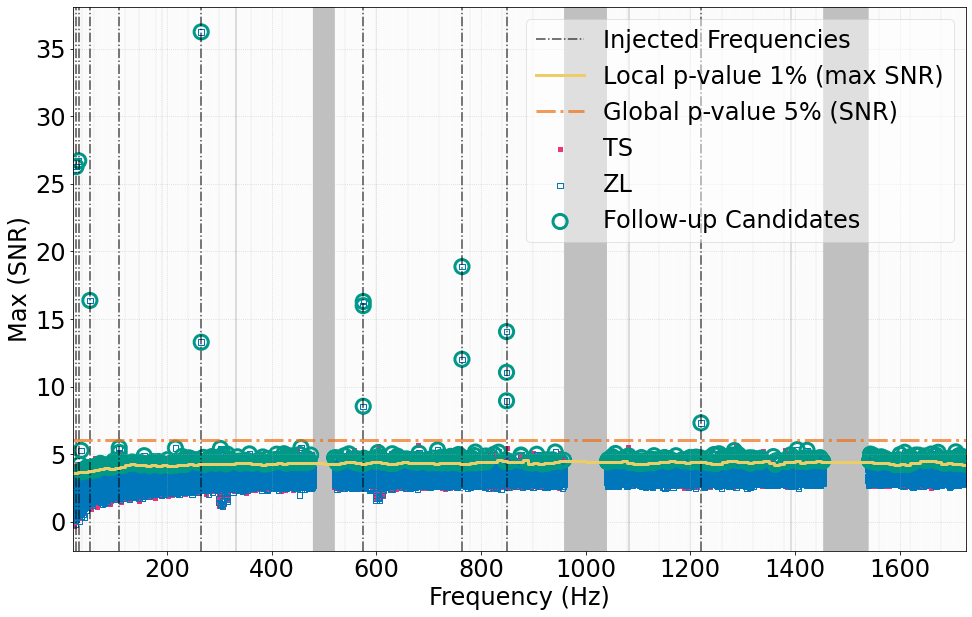

In [17]:
idx_notch=np.where(max_snr_ts==0.0)[0]
plt.figure(figsize=(16,10))  
for ii in inj_freq:
    plt.axvline(ii,color='k',ls='-.',alpha=0.7)
plt.axvline(ii,label='Injected Frequencies',color='k',ls='-.',alpha=0.7) 
for ss in idx_notch:
    plt.axvline(f_all[ss],color='silver',visible=0.05,alpha=0.2,linewidth=0.05)
plt.scatter(f_all[max_snr_ts!=0.0],max_snr_ts[max_snr_ts !=0],s=20,label='TS',color='#EE3377',marker=',')
plt.scatter(f_all[max_snr_zl!=0.0],max_snr_zl[max_snr_zl !=0],s=30,label='ZL',marker=',',edgecolor='#0077BB',facecolor='None')        
#plt.plot(freq,snr_limit,linestyle='-', color='#eecc66',label='99.9 perecntile on TS',linewidth=3)
plt.step(freq,snr_limit,where='mid',linestyle='-', color='#eecc66',label='Local p-value 1% (max SNR)',linewidth=3)
plt.scatter(cand_freq,cand_SNR,s=200,marker='o',edgecolor='#009988',facecolor='None',linewidth=3,label='Follow-up Candidates')
plt.plot(freq,np.ones(len(freq))*threshold,linestyle='-.', color='#EC7014',label='Global p-value 5% (SNR)',linewidth=3,alpha=0.7,)
plt.xlabel('Frequency (Hz)')
plt.xlim(20,1726)
plt.ylabel('Max (SNR)')
plt.legend(loc='upper right',framealpha=0.5, frameon=True)
plt.grid(ls=':',alpha=0.5)
#plt.savefig('./Paper_Plots/O1_O2_O3_Freq_max_SNR.png',bbox_inches='tight')

## Fig.2 Left Panel

In [19]:
psnr_non_zero_ts_all=np.load('./datafiles/Data_for_Histograms/all_combined_TS_SNR_hist.npy')
psnr_non_zero_zl_all=np.load('datafiles/Data_for_Histograms/all_combined_ZL_SNR_hist.npy')

Text(0, 0.5, 'Count')

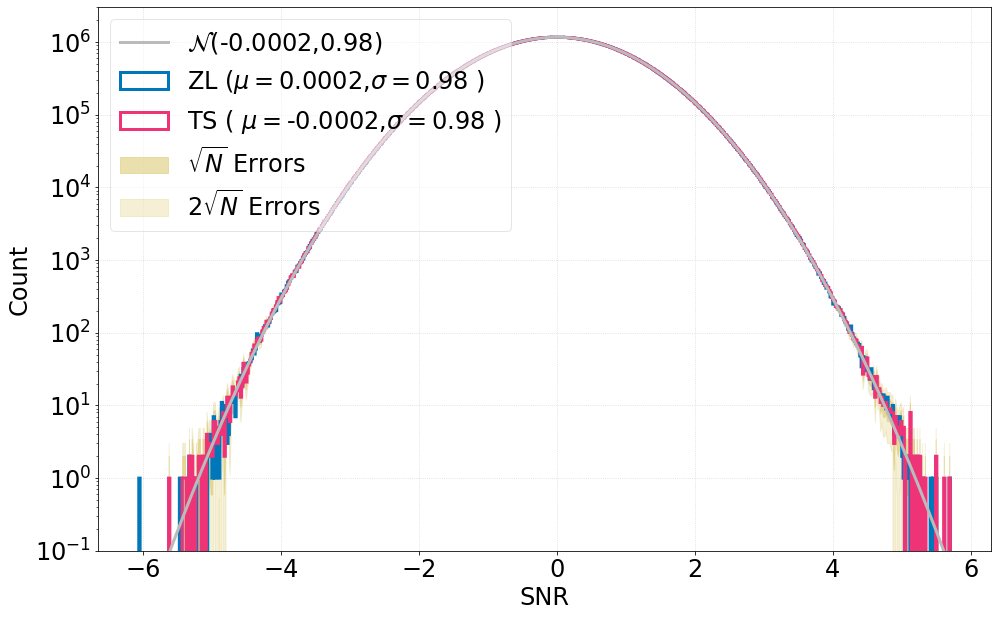

In [20]:
plt.figure(figsize=(16,10))

N=len(psnr_non_zero_zl_all)

m=np.mean(psnr_non_zero_zl_all)
sigma=np.std(psnr_non_zero_zl_all)    
h=plt.hist(psnr_non_zero_zl_all,bins=600,histtype='step',
           label='ZL ('+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#0077BB',linewidth=3)
bm=h[1][:-1]+(h[1][1]-h[1][0])/2.
m=np.mean(psnr_non_zero_ts_all)
sigma=np.std(psnr_non_zero_ts_all)
h=plt.hist(psnr_non_zero_ts_all,bins=h[1],histtype='step',
           label='TS ( '+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#EE3377',linewidth=3)
plt.plot(bm,N*(h[1][1]-h[1][0])*stats.norm.pdf(bm,m,sigma),label=r'$\mathcal{N} ($'+
                             np.str(np.around(m,4))+','+np.str(np.around(sigma,2))+')',linewidth=3,color='#BBBBBB')
plt.fill_between(bm,h[0]-np.sqrt(h[0]),h[0]+np.sqrt(h[0]),color='#DDCC77',alpha=.6,label=r'$\sqrt{N}$ '+'Errors')
plt.fill_between(bm,h[0]-2*np.sqrt(h[0]),h[0]+2*np.sqrt(h[0]),color='#DDCC77',alpha=.3,label=r'$2\sqrt{N}}$ '+'Errors')

plt.legend(loc='upper left',framealpha=0.5, frameon=True)
plt.yscale('log')
plt.xlabel('SNR')
plt.ylim(ymin=0.1)
plt.grid(ls=':',alpha=0.5)
plt.ylabel('Count')
#plt.savefig('./Paper_Plots/'+'O1_O2_O3_SNR_hist',bbox_inches='tight')     
#plt.show()
#plt.clf()

## Fig.2 Right Panel

In [21]:
data=h5py.File('./datafiles/all_combined_Freq_max_SNR.hdf5','r')
max_snr_zl=data['max_snr_zl'][:]
max_snr_ts=data['max_snr_ts'][:]
f_all=data['f_all'][:]
freq=data['freq'][:]
snr_limit= data['snr_limit_smooth'][:]
cand_freq=data['cand_freq'][:]
cand_SNR=data['cand_SNR'][:]
threshold = data['threshold'][()]
data.close()

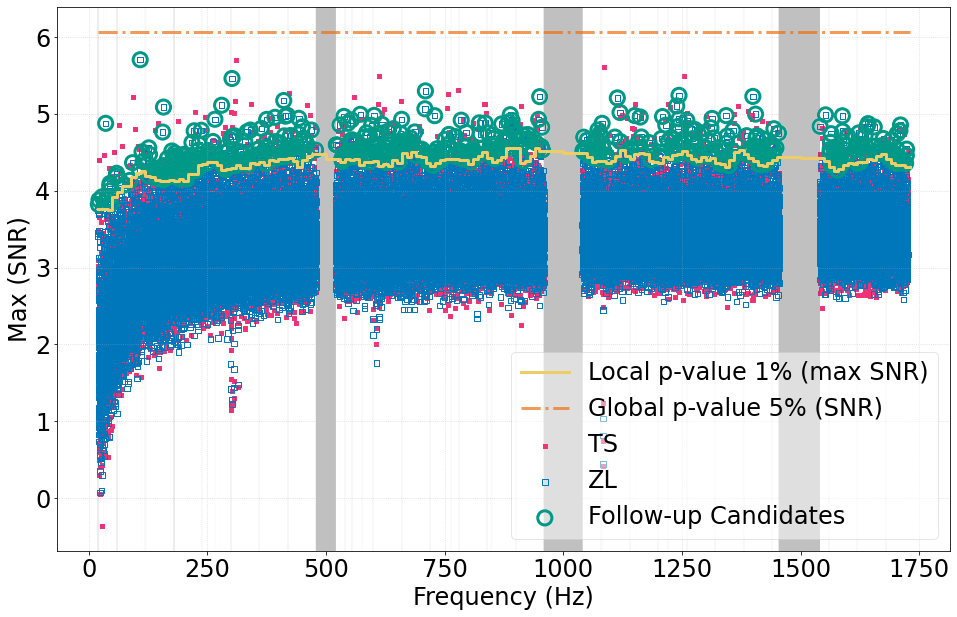

In [22]:
idx_notch=np.where(max_snr_ts==0.0)[0]
plt.figure(figsize=(16,10))  
for ss in idx_notch:
    plt.axvline(f_all[ss],color='silver',visible=0.05,alpha=0.2,linewidth=0.05)
plt.scatter(f_all[max_snr_ts!=0.0],max_snr_ts[max_snr_ts !=0],s=20,label='TS',color='#EE3377',marker=',')
plt.scatter(f_all[max_snr_zl!=0.0],max_snr_zl[max_snr_zl !=0],s=30,label='ZL',marker=',',edgecolor='#0077BB',facecolor='None')        
plt.step(freq,snr_limit,where='mid',linestyle='-', color='#eecc66',label='Local p-value 1% (max SNR)',linewidth=3)
plt.scatter(cand_freq,cand_SNR,s=200,marker='o',edgecolor='#009988',facecolor='None',linewidth=3,label='Follow-up Candidates')
plt.plot(freq,np.ones(len(freq))*threshold,linestyle='-.', color='#EC7014',label='Global p-value 5% (SNR)',linewidth=3,alpha=0.7,)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Max (SNR)')
#plt.xscale('log')
plt.legend(loc='lower right',framealpha=0.5, frameon=True)
#plt.title('HLV : Bin Size=10Hz, #Candidates = '+np.str(len(cand_SNR)))
plt.grid(ls=':',alpha=0.5)
#plt.savefig('./Paper_Plots/O1_O2_O3_Freq_max_SNR.png',bbox_inches='tight')

## Fig.3 UL Matrix Plot

In [3]:
data = h5py.File('datafiles/all_runs_Strain_UL_Final_20.0_1726.0.hdf5','r')
h0_UL = data['h0_UL'][:]
f_all = data['f_all'][:]
data.close()

3.304206272086414e-26
9.63233614895293e-24


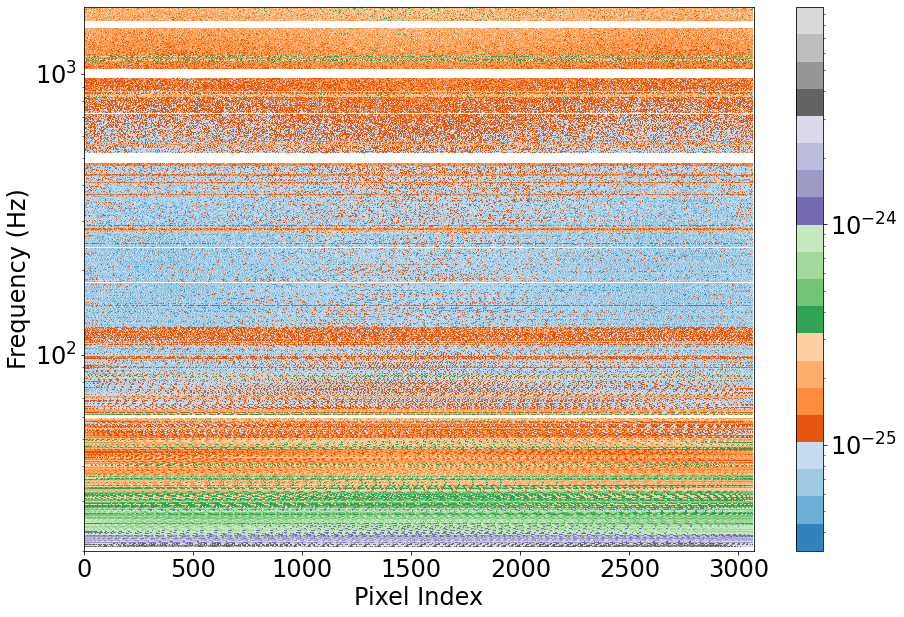

In [4]:
plt.figure(figsize=(15,10))
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print(np.min(masked))
print(np.max(masked))
cmap = matplotlib.cm.get_cmap("tab20c").copy()
cmap.set_bad(color='silver',alpha=0)
plt.imshow(masked,norm=LogNorm(),aspect='auto',origin='lower',extent=[0,3071,f_all[0],f_all[-1]],cmap=cmap,interpolation='none')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Pixel Index')
plt.yscale('log')
plt.colorbar()
plt.savefig('./Paper_Plots/O1_O2_O3_UL_matrix',bbox_inches='tight')
#plt.show()

## Fig.4 Example Upper limit and sigma Plots

Text(0.03, 0.15, '-45°')

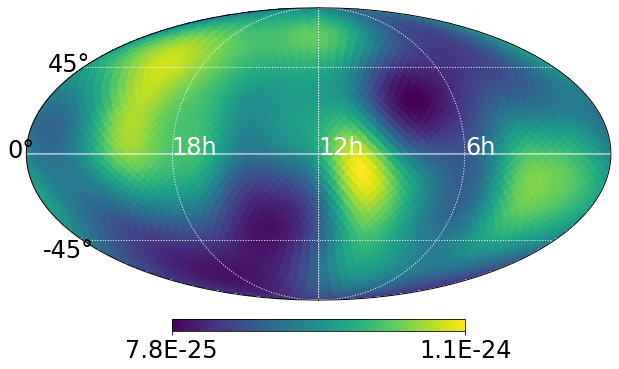

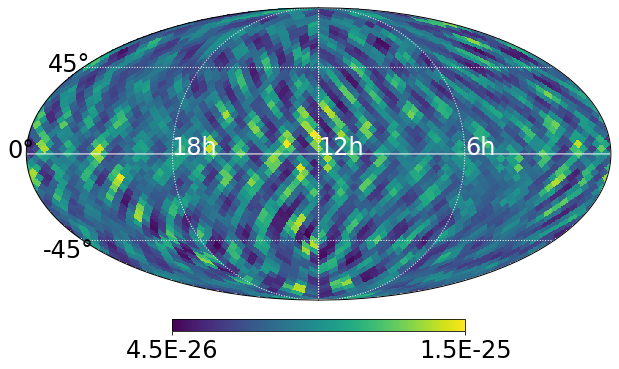

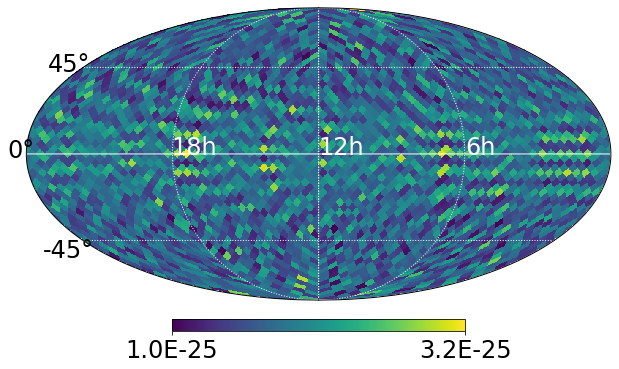

In [31]:
idx = np.abs(f_all-23.0625).argmin()
hp.mollview(h0_UL[idx,:],flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.colorbar(format='%.3E')
#plt.savefig('./Paper_Plots/h0_UL_1',bbox_inches='tight')
#plt.clf()
idx = np.abs(f_all-423.0625).argmin()
hp.mollview(h0_UL[idx,:],flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots/h0_UL_2',bbox_inches='tight')
#plt.clf()
idx = np.abs(f_all-1223.0625).argmin()
hp.mollview(h0_UL[idx,:],flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots/h0_UL_3',bbox_inches='tight')
#plt.clf()

#### We have saved the standard deviation $\sigma_{\hat{\Omega}}(f)$ of ASAF estimator $\hat{\mathcal{P}}(f,\hat{\Omega})$ is saved in the units of Power Spectral Density (PSD) in the datafiles. This quantity is converted into the units of the uncertainity in the equivalent "strain"  = $\sqrt {\sigma_{\hat{\Omega}}(f)\, \Delta f} $ unit , where $\Delta f = 0.03125 Hz$ is the frequency bin size while plotting.

In [32]:
data=h5py.File('./datafiles/all_combined_Map_ASAF_sigma_16_postproc.hdf5','r')
Sigma=data['sig'][:]
data.close()

Text(0.03, 0.15, '-45°')

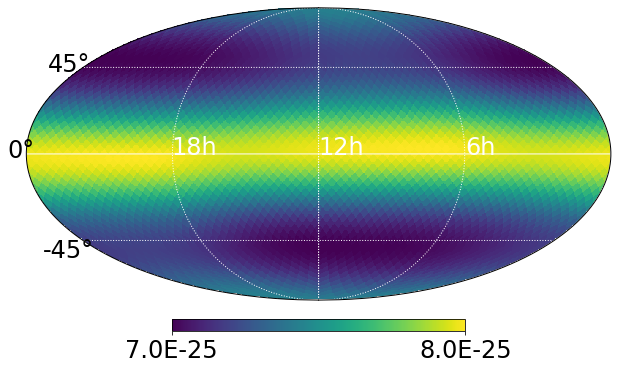

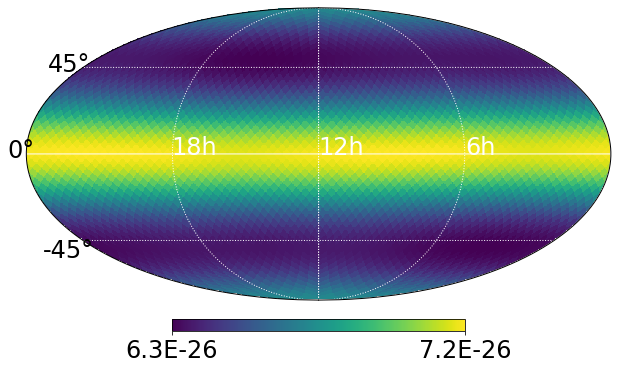

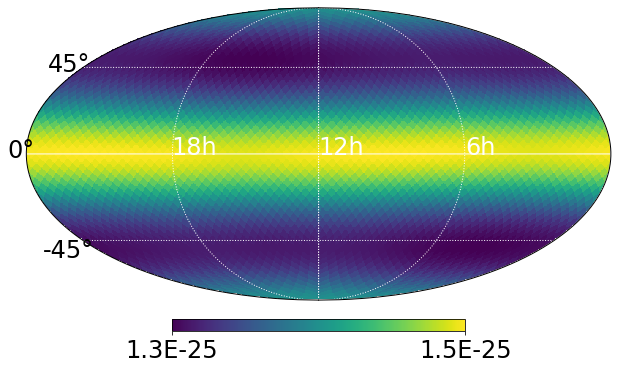

In [34]:
idx = np.abs(f_all-23.0625).argmin()
hp.mollview(np.sqrt(0.03125*Sigma[idx,:]),flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//h0_Sigma_1',bbox_inches='tight')
# plt.clf()

## Fig.5 BBR UL plot 

1.6390402080123115e-10 - 1.290440242397837e-09
1.0939626157405286e-08 - 5.61132951582815e-08
2.0607720685569613e-08 - 9.545120063512137e-08


Text(0.03, 0.15, '-45°')

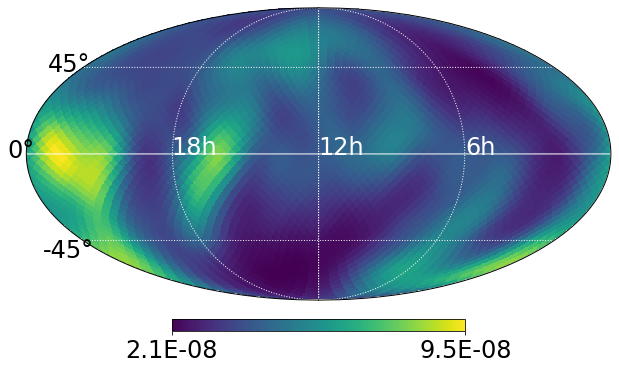

In [43]:
data=h5py.File('datafiles/O3_BBR_HL_UL.hdf5','r')
UL_a3_HL=data['a3_flux_UL'][:]
print(np.min(UL_a3_HL),'-',np.max(UL_a3_HL))
UL_a23_HL=data['a23_flux_UL'][:]
print(np.min(UL_a23_HL),'-',np.max(UL_a23_HL))
UL_a0_HL=data['a0_flux_UL'][:]
print(np.min(UL_a0_HL),'-',np.max(UL_a0_HL))
data.close()

hp.mollview(UL_a0_HL,flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//BBR_UL_a0',bbox_inches='tight')

## Fig.6 Isotropic Plot

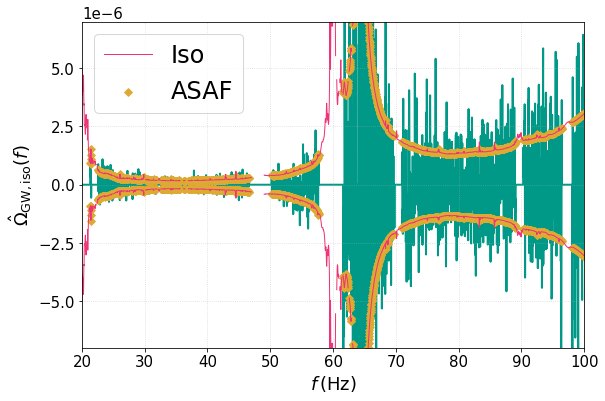

In [51]:
maps=h5py.File('datafiles/O3_HL_Isotropic_Estimators.hdf5','r')
ptEst_f_ASAF= maps['ptEst_f'][:]
sig_f_ASAF= maps['sigma_f'][:]
maps.close()

data = urlopen('https://dcc.ligo.org/public/0169/G2001287/005/C_O3_HL.dat')
sig_iso=[]
for line in data: # files are iterable    
    x = line.decode("utf-8").replace('\n','').split('\t' )
    sig_iso.append(x[2])
sig_iso = np.array(sig_iso[1:]).astype(float)    

f_all=np.arange(20.0,1726.+0.03125/2.,0.03125)
idx_min=np.abs(f_all-20.0).argmin()
idx_max=np.abs(f_all-100.0).argmin()

scale=1.5
fig,ax = plt.subplots(figsize=(6*scale,4*scale),facecolor='white')

# Define color

# Plot Data
ax.plot(f_all[idx_min:idx_max],ptEst_f_ASAF[idx_min:idx_max],color='#009988',zorder=-1,alpha=1,lw=2)

# Plot error bars
ax.scatter((f_all[idx_min:idx_max])[(sig_f_ASAF[idx_min:idx_max])!=0],(sig_f_ASAF[idx_min:idx_max])[(sig_f_ASAF[idx_min:idx_max])!=0],color='#DDAA33',label='ASAF',marker='D',s=30)
ax.plot(f_all[idx_min:idx_max],sig_iso[idx_min:idx_max],color='#EE3377',lw=1,label='Iso')
ax.scatter((f_all[idx_min:idx_max])[(sig_f_ASAF[idx_min:idx_max])!=0],-(sig_f_ASAF[idx_min:idx_max])[(sig_f_ASAF[idx_min:idx_max])!=0],color='#DDAA33',marker='D',s=30)
ax.plot(f_all[idx_min:idx_max],-sig_iso[idx_min:idx_max],color='#EE3377',lw=1)

ax.set_xlim([20.,100.])
ax.set_ylim([-7e-6,7e-6])

# Labels, grid, etc
ax.xaxis.grid(True,which='major',ls=':',alpha=0.5)
ax.yaxis.grid(True,which='major',ls=':',alpha=0.5)
ax.set_xlabel(r'$f \,(\mathrm{Hz})$',fontsize=12*scale)
ax.set_ylabel(r'$\hat \Omega_{\mathrm{GW,iso}}(f)$',fontsize=12*scale)
locs=np.arange(-5e-6,5.1e-6,2.5e-6)
ax.set_yticks(locs)
ax.tick_params(labelsize=10*scale)
ax.yaxis.offsetText.set_fontsize(10*scale)
ax.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
ax.set_axisbelow(True)
plt.legend(loc='upper left')
#plt.savefig('Paper_Plots/Cl_f',bbox_inches='tight')

In [48]:
maps=h5py.File('datafiles/O3_HL_Isotropic_Estimators.hdf5','r')
print('Broadband Isotropic Results')
print('alpha = 0  :', maps['ptEst_a0'][()], maps['sig_a0'][()])
print('alpha = 2/3  :', maps['ptEst_a23'][()], maps['sig_a23'][()])
print('alpha = 3  :', maps['ptEst_a3'][()], maps['sig_a3'][()])
maps.close()

Broadband Isotropic Results
alpha = 0  : 2.526016163174889e-09 8.601138482313183e-09
alpha = 2/3  : 6.127534346538392e-10 6.462771306280118e-09
alpha = 3  : -4.866932663695145e-10 9.940906927911959e-10


# Supplement Material Plots

## Fig.7 O2 with HWI BBR Plots

Text(0.03, 0.15, '-45°')

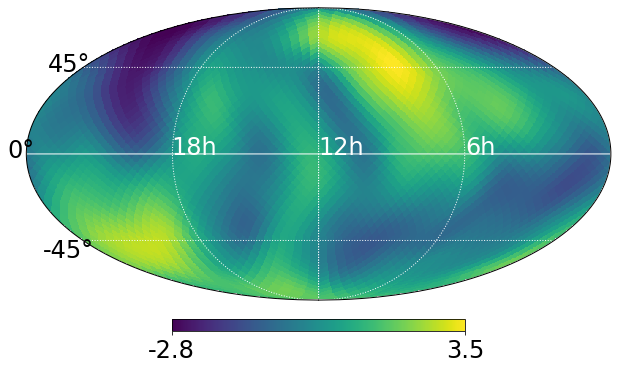

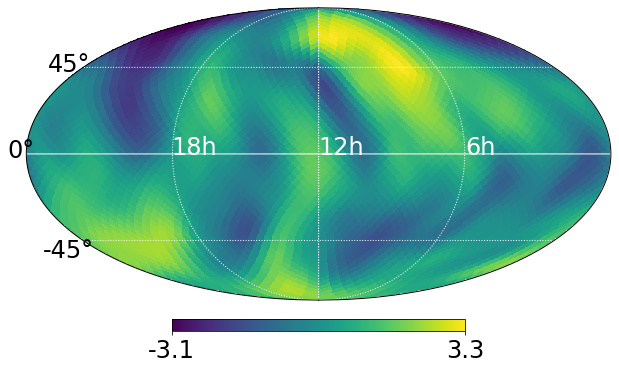

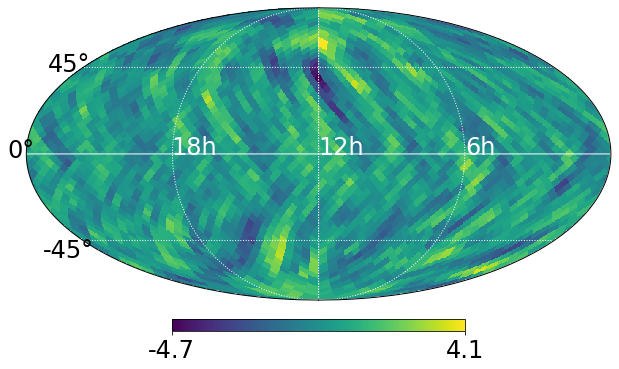

In [51]:
data = h5py.File('datafiles/O2_Map_BBR_HL_16_postproc_with_HWI.hdf5','r')
snr_a0_zl_HWI  = data['snr_a0'][:]
snr_a23_zl_HWI = data['snr_a23'][:]
snr_a3_zl_HWI  = data['snr_a3'][:]
data.close()

hp.mollview(snr_a0_zl_HWI,flip='astro',rot=(-180,0,0),title='',format='%.1f')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//BBR_SNR_O2_HWI_a0',bbox_inches='tight')

hp.mollview(snr_a23_zl_HWI,flip='astro',rot=(-180,0,0),title='',format='%.1f')
hp.graticule(45,90, color='w')
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//BBR_SNR_O2_HWI_a23',bbox_inches='tight')

hp.mollview(snr_a3_zl_HWI,flip='astro',rot=(-180,0,0),title='',format='%.1f')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//BBR_SNR_O2_HWI_a3',bbox_inches='tight')

## Fig.8 Individual Baseline Histogram for O3 run

Text(0, 0.5, 'Count')

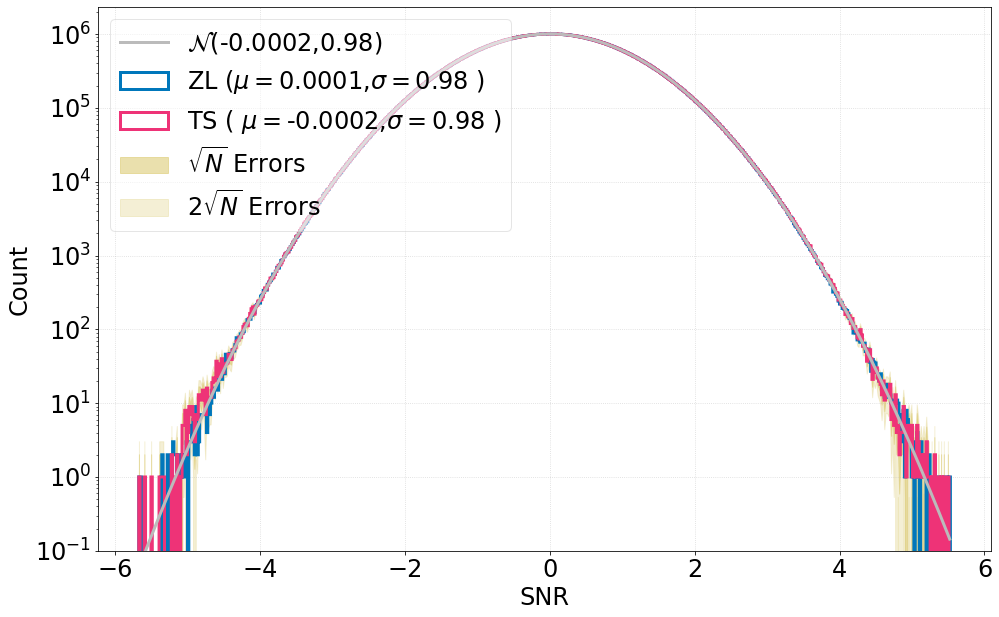

In [53]:
psnr_non_zero_ts_all=np.load('./datafiles/Data_for_Histograms/O3_HL_TS_SNR_hist.npy')
psnr_non_zero_zl_all=np.load('datafiles/Data_for_Histograms/O3_HL_ZL_SNR_hist.npy')

plt.figure(figsize=(16,10))

N=len(psnr_non_zero_zl_all)

m=np.mean(psnr_non_zero_zl_all)
sigma=np.std(psnr_non_zero_zl_all)    
h=plt.hist(psnr_non_zero_zl_all,bins=600,histtype='step',
           label='ZL ('+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#0077BB',linewidth=3)
bm=h[1][:-1]+(h[1][1]-h[1][0])/2.
m=np.mean(psnr_non_zero_ts_all)
sigma=np.std(psnr_non_zero_ts_all)
h=plt.hist(psnr_non_zero_ts_all,bins=h[1],histtype='step',
           label='TS ( '+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#EE3377',linewidth=3)
plt.plot(bm,N*(h[1][1]-h[1][0])*stats.norm.pdf(bm,m,sigma),label=r'$\mathcal{N} ($'+
                             np.str(np.around(m,4))+','+np.str(np.around(sigma,2))+')',linewidth=3,color='#BBBBBB')
plt.fill_between(bm,h[0]-np.sqrt(h[0]),h[0]+np.sqrt(h[0]),color='#DDCC77',alpha=.6,label=r'$\sqrt{N}$ '+'Errors')
plt.fill_between(bm,h[0]-2*np.sqrt(h[0]),h[0]+2*np.sqrt(h[0]),color='#DDCC77',alpha=.3,label=r'$2\sqrt{N}}$ '+'Errors')

plt.legend(loc='upper left',framealpha=0.5, frameon=True)
plt.yscale('log')
plt.xlabel('SNR')
plt.ylim(ymin=0.1)
plt.grid(ls=':',alpha=0.5)
plt.ylabel('Count')
#plt.savefig('./Paper_Plots/'+'HL_SNR_hist',bbox_inches='tight')     
#plt.show()
#plt.clf()

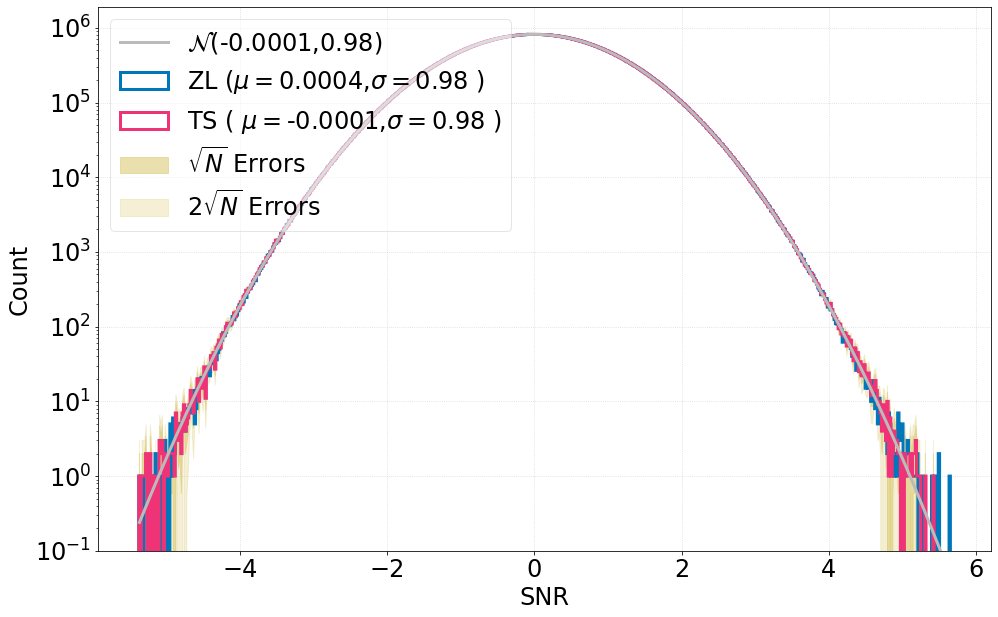

In [52]:
psnr_non_zero_ts_all=np.load('./datafiles/Data_for_Histograms/O3_HV_TS_SNR_hist.npy')
psnr_non_zero_zl_all=np.load('datafiles/Data_for_Histograms/O3_HV_ZL_SNR_hist.npy')

plt.figure(figsize=(16,10))

N=len(psnr_non_zero_zl_all)

m=np.mean(psnr_non_zero_zl_all)
sigma=np.std(psnr_non_zero_zl_all)    
h=plt.hist(psnr_non_zero_zl_all,bins=600,histtype='step',
           label='ZL ('+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#0077BB',linewidth=3)
bm=h[1][:-1]+(h[1][1]-h[1][0])/2.
m=np.mean(psnr_non_zero_ts_all)
sigma=np.std(psnr_non_zero_ts_all)
h=plt.hist(psnr_non_zero_ts_all,bins=h[1],histtype='step',
           label='TS ( '+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#EE3377',linewidth=3)
plt.plot(bm,N*(h[1][1]-h[1][0])*stats.norm.pdf(bm,m,sigma),label=r'$\mathcal{N} ($'+
                             np.str(np.around(m,4))+','+np.str(np.around(sigma,2))+')',linewidth=3,color='#BBBBBB')
plt.fill_between(bm,h[0]-np.sqrt(h[0]),h[0]+np.sqrt(h[0]),color='#DDCC77',alpha=.6,label=r'$\sqrt{N}$ '+'Errors')
plt.fill_between(bm,h[0]-2*np.sqrt(h[0]),h[0]+2*np.sqrt(h[0]),color='#DDCC77',alpha=.3,label=r'$2\sqrt{N}}$ '+'Errors')

plt.legend(loc='upper left',framealpha=0.5, frameon=True)
plt.yscale('log')
plt.xlabel('SNR')
plt.ylim(ymin=0.1)
plt.grid(ls=':',alpha=0.5)
plt.ylabel('Count')
plt.savefig('./Paper_Plots/'+'HV_SNR_hist',bbox_inches='tight')     
#plt.show()
#plt.clf()

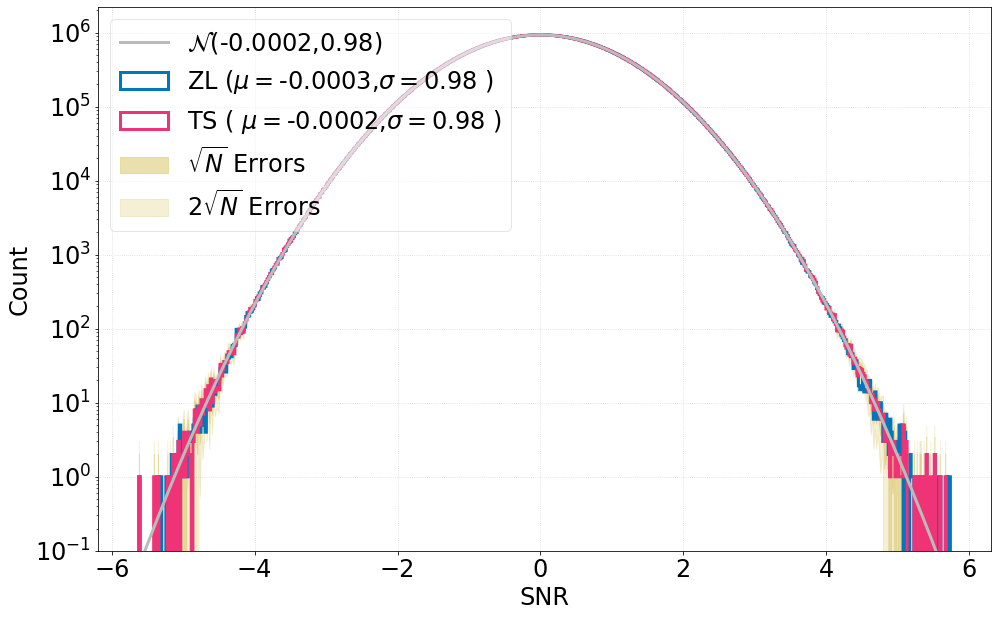

In [53]:
psnr_non_zero_ts_all=np.load('./datafiles/Data_for_Histograms/O3_LV_TS_SNR_hist.npy')
psnr_non_zero_zl_all=np.load('datafiles/Data_for_Histograms/O3_LV_ZL_SNR_hist.npy')

plt.figure(figsize=(16,10))

N=len(psnr_non_zero_zl_all)

m=np.mean(psnr_non_zero_zl_all)
sigma=np.std(psnr_non_zero_zl_all)    
h=plt.hist(psnr_non_zero_zl_all,bins=600,histtype='step',
           label='ZL ('+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#0077BB',linewidth=3)
bm=h[1][:-1]+(h[1][1]-h[1][0])/2.
m=np.mean(psnr_non_zero_ts_all)
sigma=np.std(psnr_non_zero_ts_all)
h=plt.hist(psnr_non_zero_ts_all,bins=h[1],histtype='step',
           label='TS ( '+r'$\mu=$'+np.str(np.around(m,4))+','+r'$\sigma=$'+np.str(np.around(sigma,2))+' )',color='#EE3377',linewidth=3)
plt.plot(bm,N*(h[1][1]-h[1][0])*stats.norm.pdf(bm,m,sigma),label=r'$\mathcal{N} ($'+
                             np.str(np.around(m,4))+','+np.str(np.around(sigma,2))+')',linewidth=3,color='#BBBBBB')
plt.fill_between(bm,h[0]-np.sqrt(h[0]),h[0]+np.sqrt(h[0]),color='#DDCC77',alpha=.6,label=r'$\sqrt{N}$ '+'Errors')
plt.fill_between(bm,h[0]-2*np.sqrt(h[0]),h[0]+2*np.sqrt(h[0]),color='#DDCC77',alpha=.3,label=r'$2\sqrt{N}}$ '+'Errors')

plt.legend(loc='upper left',framealpha=0.5, frameon=True)
plt.yscale('log')
plt.xlabel('SNR')
plt.ylim(ymin=0.1)
plt.grid(ls=':',alpha=0.5)
plt.ylabel('Count')
plt.savefig('./Paper_Plots/'+'LV_SNR_hist',bbox_inches='tight')     
#plt.show()
#plt.clf()

## Fig. 9

3.4907496949710406e-26
2.604800056403126e-24


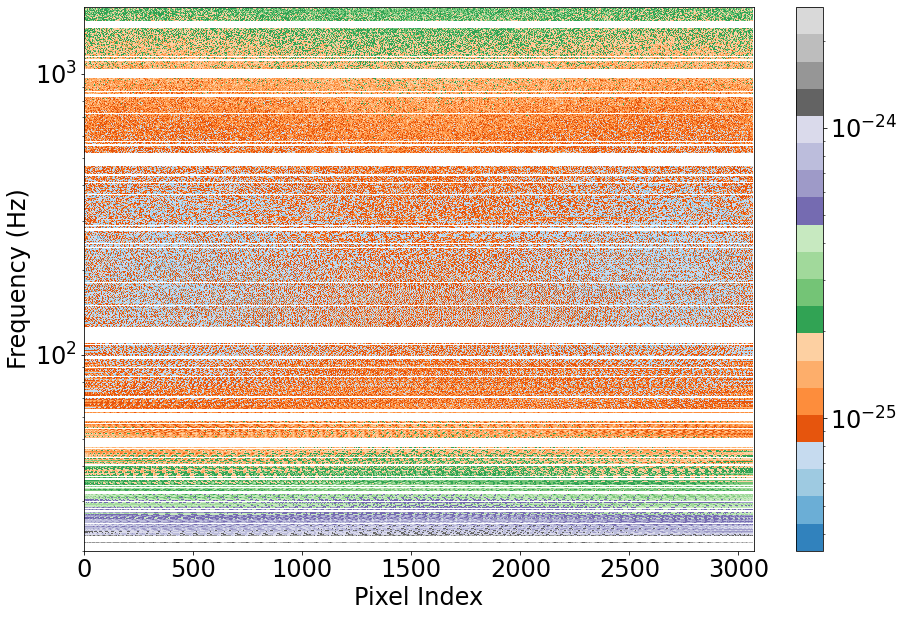

In [60]:
data = h5py.File('datafiles/O3_ASAF_HL_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()

plt.figure(figsize=(15,10))
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print(np.min(masked))
print(np.max(masked))
cmap = matplotlib.cm.get_cmap("tab20c").copy()
cmap.set_bad(color='silver',alpha=0)
plt.imshow(masked,norm=LogNorm(),aspect='auto',origin='lower',extent=[0,3071,f_all[0],f_all[-1]],cmap=cmap,interpolation='none')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Pixel Index')
plt.yscale('log')
plt.colorbar()
#plt.savefig('./Paper_Plots/HL_strain_UL',bbox_inches='tight')
#plt.show()

6.798483469186745e-26
1.0859243801197911e-23


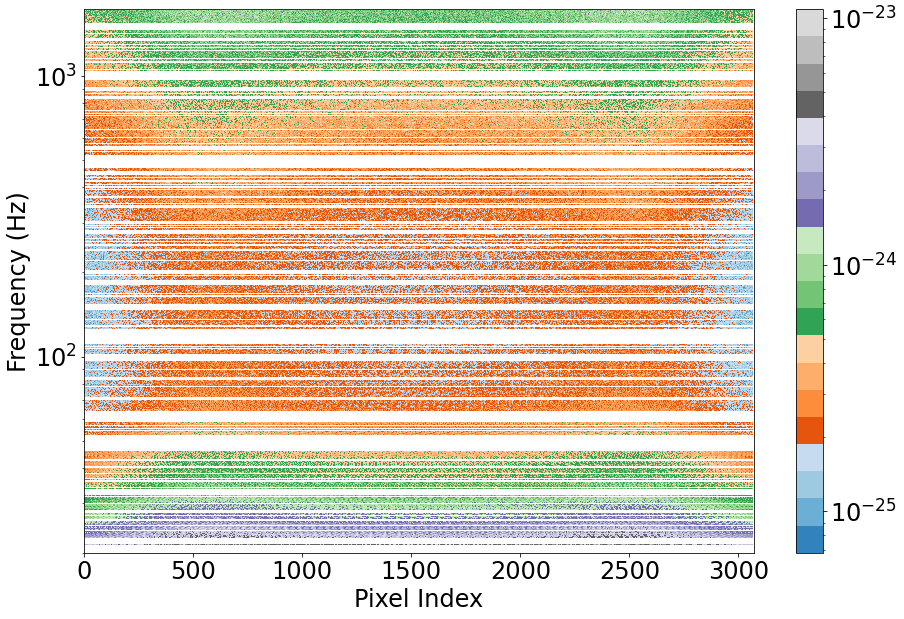

In [61]:
data = h5py.File('datafiles/O3_ASAF_HV_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()

plt.figure(figsize=(15,10))
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print(np.min(masked))
print(np.max(masked))
cmap = matplotlib.cm.get_cmap("tab20c").copy()
cmap.set_bad(color='silver',alpha=0)
plt.imshow(masked,norm=LogNorm(),aspect='auto',origin='lower',extent=[0,3071,f_all[0],f_all[-1]],cmap=cmap,interpolation='none')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Pixel Index')
plt.yscale('log')
plt.colorbar()
#plt.savefig('./Paper_Plots/HV_strain_UL',bbox_inches='tight')
#plt.show()

7.390704368585705e-26
9.632336148952932e-24


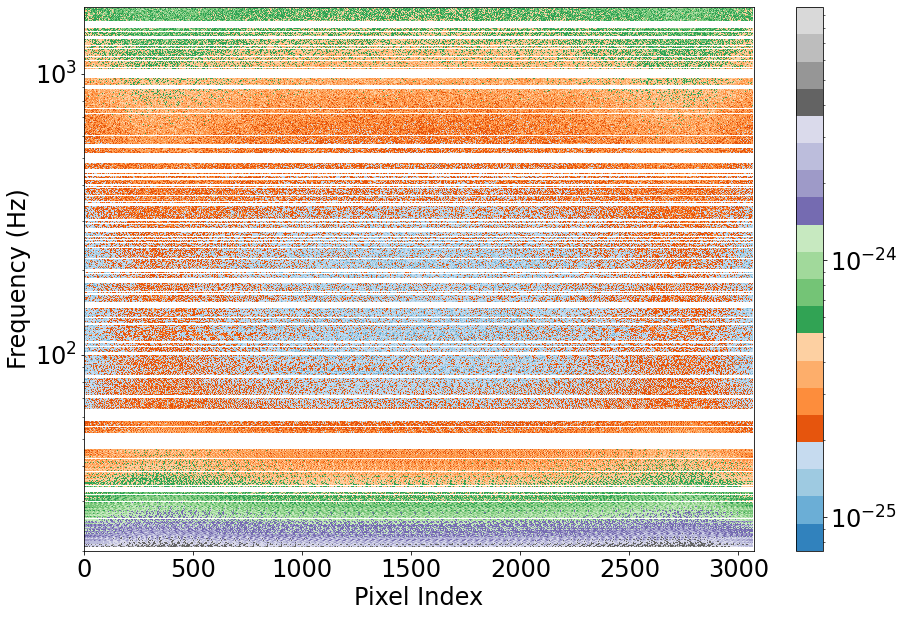

In [62]:
data = h5py.File('datafiles/O3_ASAF_LV_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()

plt.figure(figsize=(15,10))
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print(np.min(masked))
print(np.max(masked))
cmap = matplotlib.cm.get_cmap("tab20c").copy()
cmap.set_bad(color='silver',alpha=0)
plt.imshow(masked,norm=LogNorm(),aspect='auto',origin='lower',extent=[0,3071,f_all[0],f_all[-1]],cmap=cmap,interpolation='none')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Pixel Index')
plt.yscale('log')
plt.colorbar()
#plt.savefig('./Paper_Plots/LV_strain_UL',bbox_inches='tight')
#plt.show()

## Fig.10

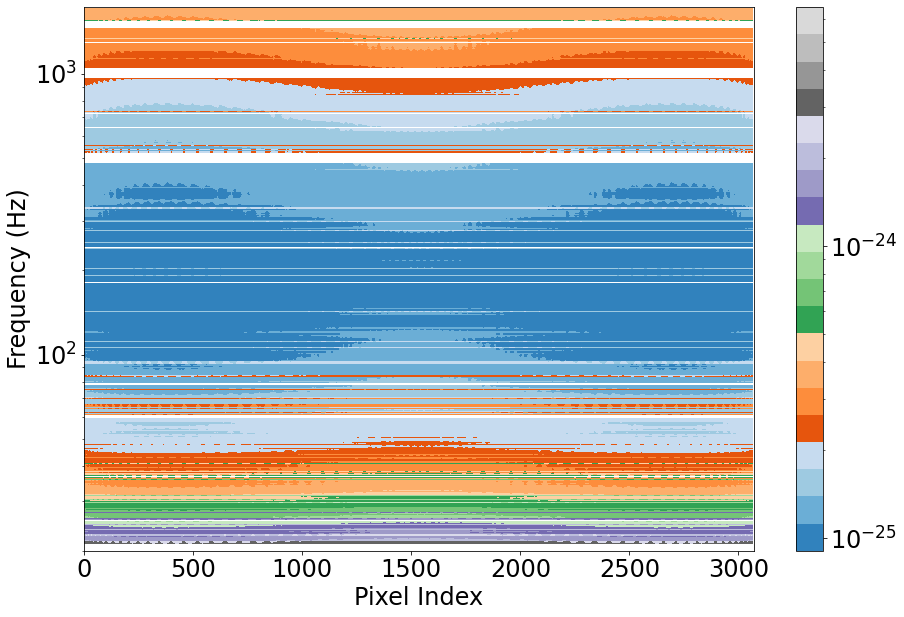

In [64]:
data=h5py.File('./datafiles/O1_O2_Map_ASAF_sigma_16_postproc.hdf5','r')
Sig=np.sqrt(data['sig'][:]*0.03125)
data.close()

plt.figure(figsize=(15,10))
sig_masked = np.ma.masked_where(Sig== 0.0, Sig)
cmap = matplotlib.cm.get_cmap("tab20c").copy()
cmap.set_bad(color='silver',alpha=0)
plt.imshow(sig_masked,norm=LogNorm(),aspect='auto',origin='lower',extent=[0,3071,20.,1726.],cmap=cmap,interpolation='none')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Pixel Index')
plt.yscale('log')
plt.colorbar()
#plt.savefig('Paper_Plots/O1_O2_sigma_matrix',bbox_inches='tight')
#plt.show()

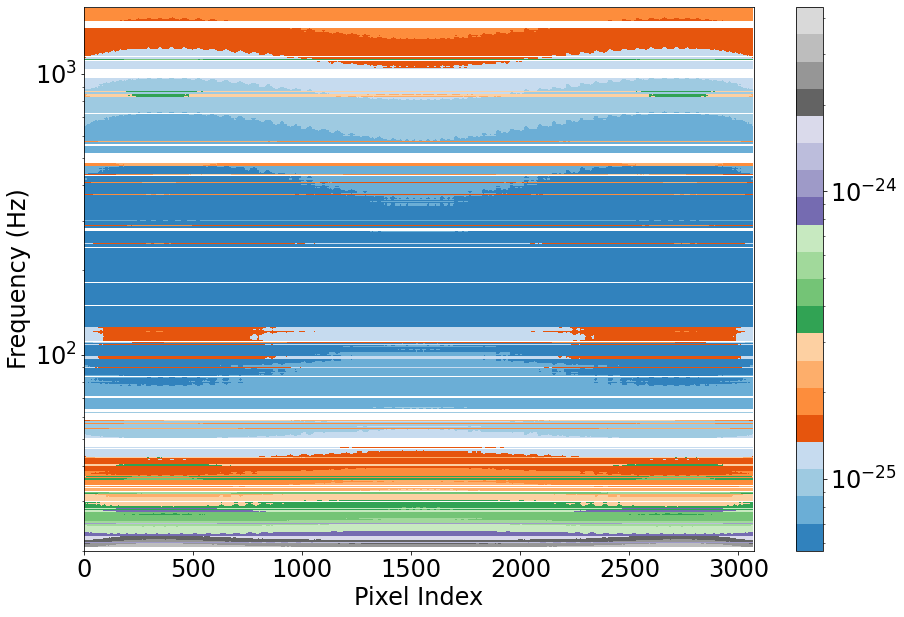

In [65]:
data=h5py.File('./datafiles/O3_Map_ASAF_HLV_sigma_16_postproc.hdf5','r')
Sig=np.sqrt(data['sig'][:]*0.03125)
data.close()

plt.figure(figsize=(15,10))
sig_masked = np.ma.masked_where(Sig== 0.0, Sig)
cmap = matplotlib.cm.get_cmap("tab20c").copy()
cmap.set_bad(color='silver',alpha=0)
plt.imshow(sig_masked,norm=LogNorm(),aspect='auto',origin='lower',extent=[0,3071,20.,1726.],cmap=cmap,interpolation='none')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Pixel Index')
plt.yscale('log')
plt.colorbar()
#plt.savefig('Paper_Plots/O3_HLV_sigma_matrix',bbox_inches='tight')
#plt.show()

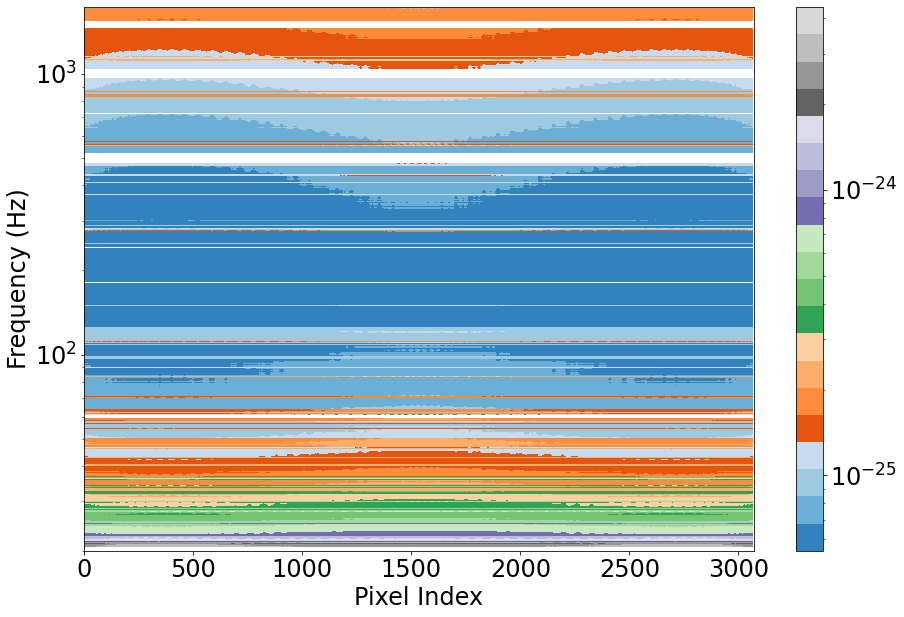

In [66]:
data=h5py.File('./datafiles/all_combined_Map_ASAF_sigma_16_postproc.hdf5','r')
Sig=np.sqrt(data['sig'][:]*0.03125)
data.close()

plt.figure(figsize=(15,10))
sig_masked = np.ma.masked_where(Sig== 0.0, Sig)
cmap = matplotlib.cm.get_cmap("tab20c").copy()
cmap.set_bad(color='silver',alpha=0)
plt.imshow(sig_masked,norm=LogNorm(),aspect='auto',origin='lower',extent=[0,3071,20.,1726.],cmap=cmap,interpolation='none')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Pixel Index')
plt.yscale('log')
plt.colorbar()
#plt.savefig('Paper_Plots/O1_O2_O3_sigma_matrix',bbox_inches='tight')
#plt.show()


## Fig. 11

Text(0.03, 0.15, '-45°')

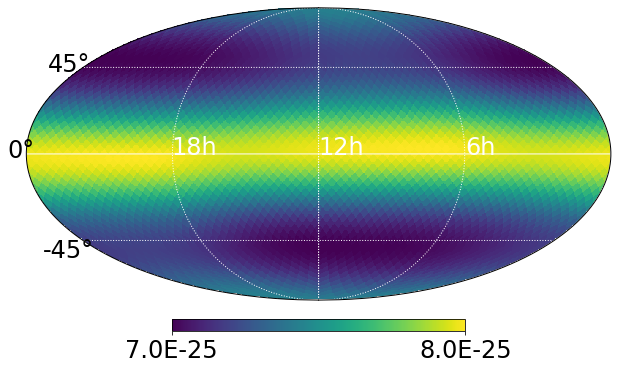

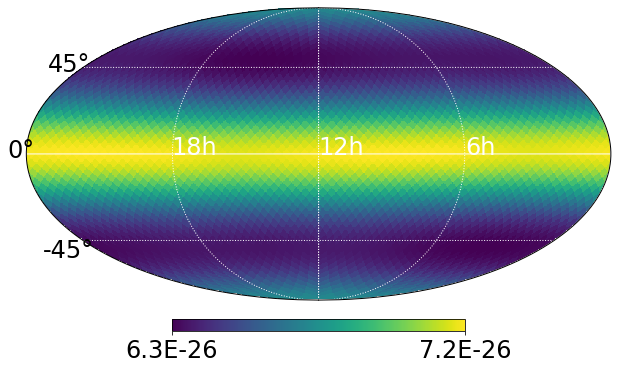

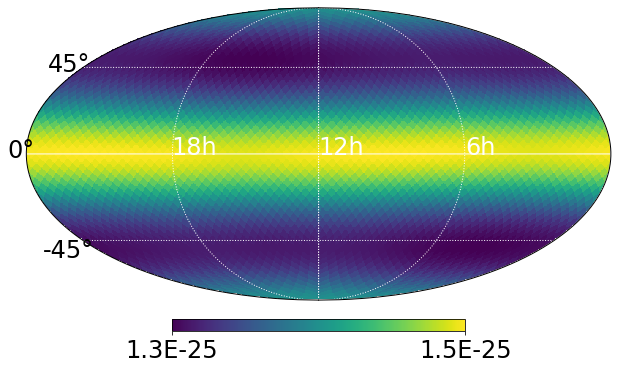

In [58]:
data=h5py.File('./datafiles/all_combined_Map_ASAF_sigma_16_postproc.hdf5','r')
Sigma=data['sig'][:]
data.close()

idx = np.abs(f_all-23.0625).argmin()
hp.mollview(np.sqrt(0.03125*Sigma[idx,:]),flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//h0_Sigma_1',bbox_inches='tight')
# plt.clf()
idx = np.abs(f_all-423.0625).argmin()
hp.mollview(np.sqrt(0.03125*Sigma[idx,:]),flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//h0_Sigma_2',bbox_inches='tight')
# plt.clf()
idx = np.abs(f_all-1223.0625).argmin()
hp.mollview(np.sqrt(0.03125*Sigma[idx,:]),flip='astro',rot=(-180,0,0),title='',format='%.1E')
hp.graticule(45,90, color='w');
plt.annotate('12h',(0.5,0.5),xycoords='axes fraction', color='w')
plt.annotate('6h',(0.75,0.5),xycoords='axes fraction', color='w')
plt.annotate('18h',(0.25,0.5),xycoords='axes fraction', color='w')
plt.annotate('45°',(0.04,0.78),xycoords='axes fraction')
plt.annotate('0°',(-0.03,0.49),xycoords='axes fraction')
plt.annotate('-45°',(0.03,0.15),xycoords='axes fraction')
#plt.savefig('Paper_Plots//h0_Sigma_3',bbox_inches='tight')
# plt.clf()

## Table. II

In [74]:
data = h5py.File('datafiles/O1_ASAF_HL_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print('O1 (HL):',format(np.min(masked),'.3g'),'-',format(np.max(masked),'.3g') , 'median = ' , format(np.ma.median(masked),'.3g'))

O1 (HL): 9.25e-26 - 8.54e-24 median =  3.89e-25


In [75]:
data = h5py.File('datafiles/O2_ASAF_HL_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print('O2 (HL):',format(np.min(masked),'.3g'),'-',format(np.max(masked),'.3g') , 'median = ' , format(np.ma.median(masked),'.3g'))

O2 (HL): 5.9e-26 - 4.13e-24 median =  2.62e-25


In [76]:
data = h5py.File('datafiles/O3_ASAF_HL_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print('O3 (HL):',format(np.min(masked),'.3g'),'-',format(np.max(masked),'.3g') , 'median = ' , format(np.ma.median(masked),'.3g'))

O3 (HL): 3.49e-26 - 2.6e-24 median =  1.37e-25


In [77]:
data = h5py.File('datafiles/O3_ASAF_HV_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print('O3 (HV):',format(np.min(masked),'.3g'),'-',format(np.max(masked),'.3g') , 'median = ' , format(np.ma.median(masked),'.3g'))

O3 (HV): 6.8e-26 - 1.09e-23 median =  4.7e-25


In [78]:
data = h5py.File('datafiles/O3_ASAF_LV_Strain_UL_Final.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print('O3 (LV):',format(np.min(masked),'.3g'),'-',format(np.max(masked),'.3g') , 'median = ' , format(np.ma.median(masked),'.3g'))

O3 (LV): 7.39e-26 - 9.63e-24 median =  3.76e-25


In [79]:
data = h5py.File('datafiles/all_runs_Strain_UL_Final_20.0_1726.0.hdf5','r')
h0_UL = data['h0_UL'][:]
data.close()
masked = np.ma.masked_where(h0_UL== 0.0, h0_UL)
print('O1+O2+O3(HLV) :',format(np.min(masked),'.3g'),'-',format(np.max(masked),'.3g') , 'median = ' , format(np.ma.median(masked),'.3g'))

O1+O2+O3(HLV) : 3.3e-26 - 9.63e-24 median =  1.38e-25


## Effective Sigma Value's calculation to get an idea about improvemnet with different runs/baselines

In [80]:
def eff_Sigma(Sigma):
    with np.errstate(divide='ignore', invalid='ignore'):
        c = np.true_divide(np.ones_like(Sigma),Sigma**2)
        c[c == np.inf] = 0
        c = np.nan_to_num(c)    
    return np.sqrt( np.mean(c)**-0.5 * 0.03125)

In [84]:
data=h5py.File('./datafiles/O1_O2_Map_ASAF_sigma_16_postproc.hdf5','r')
Sig=data['sig'][:]
data.close()
print('O1+O2 :',format(eff_Sigma(Sig),'.3g'))

O1+O2 : 1.5e-25


In [86]:
data=h5py.File('./datafiles/O3_Map_ASAF_HL_sigma_16_postproc.hdf5','r')
Sig=data['sig'][:]
data.close()
print('O3 HL :',format(eff_Sigma(Sig),'.3g'))

O3 HL : 8.89e-26


In [87]:
data=h5py.File('./datafiles/O3_Map_ASAF_HV_sigma_16_postproc.hdf5','r')
Sig=data['sig'][:]
data.close()
print('O3 HV :',format(eff_Sigma(Sig),'.3g'))

O3 HV : 2.54e-25


In [88]:
data=h5py.File('./datafiles/O3_Map_ASAF_LV_sigma_16_postproc.hdf5','r')
Sig=data['sig'][:]
data.close()
print('O3 LV :',format(eff_Sigma(Sig),'.3g'))

O3 LV : 2.2e-25


In [89]:
data=h5py.File('./datafiles/O3_Map_ASAF_HLV_sigma_16_postproc.hdf5','r')
Sig=data['sig'][:]
data.close()
print('O3 HLV :',format(eff_Sigma(Sig),'.3g'))

O3 HLV : 8.8e-26


In [90]:
data=h5py.File('./datafiles/all_combined_Map_ASAF_sigma_16_postproc.hdf5','r')
Sig=data['sig'][:]
data.close()
print('all Combined :',format(eff_Sigma(Sig),'.3g'))

all Combined : 8.56e-26
